<img src="img/f_blue@2x.png" width="15%" align="left"/>

<br></br>

# Data driven decision making using a rapid optimal service placement solution
---
*26 April 2022* \
**Author**: Alistair Steward \@ Flowminder foundation

<br></br>

XXXX

**The problem:** XXXX


# rewrite


## Getting started
---
### Exercise Overview
---
Using geospatial analysis in Python, this demo will show an assessment of health facility coverage for maternal health using the GRID3 population data for Kaduna State.

In this exercise we are going to:

- Load some spatial data
- Subset the data to focus on points of interest
- Aggregate dataset using some basic geospatial techniques
- Try and identify connections between datasets to set targets

### Loading Packages
---

In [2]:
# General purpose libraries.
import pandas as pd
import os
import numpy as np

# Geospatial libraries.
import geopandas as gpd
import rioxarray
import rasterio
from rasterio.plot import show
import folium
# Voronoi and Zonal statistics libraries
from rasterstats import zonal_stats

# Visualization libraries.
from IPython.display import display
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors

In [ ]:
# notes
#Kaduna total: 10847178.027184606
#Kaduna new sites: 6562328.11129499
#Kaduna existing sites: 4284850

### Loading Datasets
We have four datasets used in this example:

These datasets can be obtained from the GRID3 Nigeria Data portal at https://grid3.gov.ng/

>- [**Health facility locations**](https://grid3.gov.ng/dataset/kaduna-health-care-facilities-primary-secondary-and-tertiary/resources)
>- [**Ward boundaries**](https://grid3.gov.ng/dataset/kaduna-operational-ward-boundaries)
>- [**Gridded population**](https://grid3.gov.ng/dataset/national-population-estimates/resources)\
We provide an already prepared dataset with women aged 15-49 for Kaduna State
>- [**State boundary**](https://grid3.gov.ng/dataset/kaduna-state-administrative-boundaries)


In [45]:
# Path for the data folder
data_path = os.path.join(os.getcwd(), 'data')

# Load population
population =  rioxarray.open_rasterio(os.path.join(data_path, str('NGA_population_v2_0_gridded.tif')))

# Load boundaries
state_boundaries = gpd.read_file(data_path + '/GRID3_NGA_State_Boundaries/NGA_State_Boundaries.shp')

# Load existing healthcare facilities
health_sites = gpd.read_file(data_path + '/NGA_COVAX_PHCs_Hospitals_20210408.gdb', 
                           layer = 'COVAX_NGA_matched_PHCs_20210408')

# filter to Kaduna
kaduna_boundary = state_boundaries.loc[state_boundaries['state_name'] == 'Kaduna']
kaduna_existing_sites = health_sites.loc[health_sites['states'] == 'Kaduna']

# filter to relevant columns
kaduna_existing_sites = kaduna_existing_sites[['facility', '_intro_geo_longitude', 
                                               '_intro_geo_latitude', 
                                               'lgas', 'Wards', 'geometry']]


In [47]:
kaduna_existing_sites['longitude'] = kaduna_existing_sites['_intro_geo_longitude']

In [48]:
kaduna_existing_sites['latitude'] = kaduna_existing_sites['_intro_geo_latitude']

In [53]:
kaduna_existing_sites= kaduna_existing_sites.reset_index(drop=True)

In [54]:
kaduna_existing_sites = kaduna_existing_sites[['facility', 'longitude', 
                                               'latitude', 
                                               'lgas', 'Wards', 'geometry']]

In [57]:
kaduna_existing_sites.to_file(data_path + '/kaduna_existing_sites.geojson')

In [56]:
kaduna_boundary = kaduna_boundary.reset_index(drop=True)

In [58]:
kaduna_boundary.to_file(data_path + '/kaduna_boundary.geojson')

### Existing coverage

In [41]:
#Define coordinates of where we want to center our map
boulder_coords = [10.48650018, 7.42406665]

#Create the map
my_map = folium.Map(location = boulder_coords, zoom_start = 8)

folium.GeoJson(kaduna_boundary).add_to(my_map)

#folium.Circle(kaduna_existing_sites).add_to(my_map)

folium.Circle(location=kaduna_existing_sites, color='crimson', fill=False,).add_to(m)

ValueError: The truth value of a GeoDataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [42]:
kaduna_existing_sites

,facility,lgas,Wards,geometry
3979,Health Clinic Gwanda,Birnin Gwari,Damari,POINT (7.04518 11.06819)
3980,Funtuwan Badadi,Birnin Gwari,Dogon Dawa,POINT (7.08825 11.03690)
3981,H C KWAGA,Birnin Gwari,Gayam,POINT (6.62737 10.71010)
3982,Health Clinic Sabon Layi,Birnin Gwari,Kakangi,POINT (6.35725 10.65003)
3983,PHC Kutemeshi,Birnin Gwari,Kutemeshi,POINT (7.11689 11.17696)
...,...,...,...,...
4225,Health clinic Dandutse,Zaria,Tudun Wada,POINT (7.71897 11.08291)
4226,H/c Tudun jukun,Zaria,Tukur Tukur,POINT (7.70460 11.09665)
4227,Kafan kibo H/clinic,Zaria,Unguwar Fatika,POINT (7.69458 11.07667)
4228,Alfadarai Hc,Zaria,Unguwar Juma,POINT (7.69436 11.05355)


In [39]:
#Display the map
my_map

<AxesSubplot: >

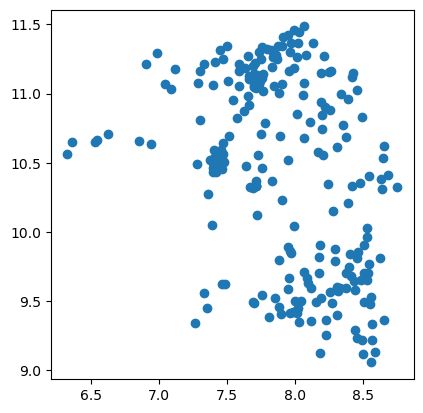

In [11]:
kaduna_existing_sites.plot()

In [5]:
kaduna_boundary = state_boundaries.loc[state_boundaries['state_name'] == 'Kaduna']

,OBJECTID,id,geometry_t,state_code,state_name,capital_ci,global_id,source,geographic,Shape__Are,Shape__Len,Shape__A_1,Shape__L_1,SHAPE_Leng,SHAPE_Area,geometry
0,1,sv_boundary_states.fid-65d4c550_169d91acef3_3f09,MULTIPOLYGON,SO,Sokoto,Sokoto,143c5cd1-9f44-4935-ab8a-891e4c05451e,eHA_Polio,NWZ,None,None,2.587049,11.508244,11.508244,2.587049,"POLYGON ((4.63265 11.67143, 4.62886 11.66810, ..."
1,2,sv_boundary_states.fid-65d4c550_169d91acef3_3f0d,MULTIPOLYGON,GO,Gombe,Gombe,7f847a2d-2643-4825-91f6-629e58024fe8,eHA_Polio,NEZ,None,None,1.373647,6.112620,6.112620,1.373647,"POLYGON ((10.96913 9.61535, 10.96932 9.61550, ..."
2,3,sv_boundary_states.fid-65d4c550_169d91acef3_3f10,MULTIPOLYGON,AD,Adamawa,Yola,7d2a1c11-b5cb-45f3-b61e-7645aade9903,eHA_Polio,NEZ,None,None,3.287267,12.148992,12.148992,3.287267,"POLYGON ((12.20157 8.10679, 12.20152 8.10679, ..."
3,4,sv_boundary_states.fid-65d4c550_169d91acef3_3f15,MULTIPOLYGON,ZA,Zamfara,Gusau,580df05c-a031-4664-962b-b326bfb53c78,eHA_Polio,NWZ,None,None,2.847175,10.755336,10.755336,2.847175,"POLYGON ((6.57204 11.02215, 6.57237 11.02276, ..."
4,5,sv_boundary_states.fid-65d4c550_169d91acef3_3f1b,MULTIPOLYGON,YO,Yobe,Damaturu,c03f7766-4ea5-4072-8bb3-713bc72832a5,eHA_Polio,NEZ,None,None,3.802092,11.792677,11.792677,3.802092,"POLYGON ((11.71435 10.63409, 11.70572 10.63111..."
5,6,sv_boundary_states.fid-65d4c550_169d91acef3_3f23,MULTIPOLYGON,BR,Borno,Maiduguri,186a35e2-d392-4bf3-8bfd-132da2a2e0f1,eHA_Polio,NEZ,None,None,5.987579,14.790788,14.790788,5.987579,"POLYGON ((11.98919 10.03755, 11.97055 10.03494..."
6,7,sv_boundary_states.fid-65d4c550_169d91acef3_3f34,MULTIPOLYGON,AK,Akwa Ibom,Uyo,83fe39c7-8a62-4bb9-8cf7-8f2b58b5c276,eHA_Polio,SSZ,None,None,0.559182,3.770444,3.770444,0.559182,"POLYGON ((7.54124 4.73247, 7.53394 4.75336, 7...."
7,8,sv_boundary_states.fid-65d4c550_169d91acef3_3f38,MULTIPOLYGON,BA,Bauchi,Bauchi,1f4ec129-23e3-45bb-b60d-de1b159bb5f6,eHA_Polio,NEZ,None,None,4.099962,15.117324,15.117324,4.099962,"POLYGON ((9.57922 9.55167, 9.57816 9.54280, 9...."
8,9,sv_boundary_states.fid-65d4c550_169d91acef3_3f42,MULTIPOLYGON,OG,Ogun,Abeokuta,7f0787e4-4518-4486-8bc5-51c5232df9d1,eHA_Polio,SWZ,None,None,1.363913,9.632816,9.632816,1.363913,"POLYGON ((4.59755 6.36057, 4.59757 6.35688, 4...."
9,10,sv_boundary_states.fid-65d4c550_169d91acef3_3f48,MULTIPOLYGON,NI,Niger,Minna,eec25567-4a6e-4752-81e3-04821eccc3fd,eHA_Polio,NCZ,None,None,5.850127,18.897858,18.897858,5.850127,"POLYGON ((6.76434 8.30751, 6.76427 8.30747, 6...."


In [ ]:
# map existing health facilities and population for whole country

In [ ]:
# add new sites (100% coverage)

In [ ]:
# coverage curve

In [ ]:
# choose some thresholds

In [ ]:
# map new sites with priority levels (focus on one area?)